<a href="https://colab.research.google.com/github/chayvw18/Master-Statistics-ML/blob/main/The_T_Test_Family.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%cd /content/drive/MyDrive/MasterStats

/content/drive/MyDrive/MasterStats


**Purpose and Interpretation of the T-Test**

<br>
The main idea of a T-test is to compare the values, typically two means between two different groups
<br>

*HA = larger mean or a mean thats different between groups*
<br>

*H0 = the means of the two groups are equal and that we could shuffle the group assignement and it wouldnt change significantly*

<br>
We can have a HA were you test your mean to against a zero value, and we are looking to see if the mean value is significantly different than zero.

**T-Test Formula**

<br>
tk = x-bar - y-bar/*sample* std/sqrt(n)

<br>
The general way to interalize what the T-Test is doing is to conceptualize

<br>

it as *Difference of Means/ Standard Deviations*



**P-Value from T-Values**
<br>

Due to sample variability there's going to be a range of t-values that you could expect even if the H0 is true.
<br>
If the H0 is true then the differences of means would be zero, so the expectations value of the t-statistics under the H0 is zero
<br>
sample variability and nosie will push the the t-value around.
<br>
Determining statistical significance and deriving a p-value from a t-value is to compare the t-value that you actaully observed in your real data against this analytic distribution
<br>
 *How to maximize your t-value*
 <br>
 *we want to maximize our t-value to get it further away from zero, the larger the t-value magnitude the smaller the p values are going to be, and thats what we want a statistically significant t-statistic*
* Increase the group differences- get the mean of x to be very different from the mean of y
* Reduces variances
* Increase sample size- when we increase n we get a larger t via a sqrt relationship

**One Sample T-Test**
<br>
Test whether a set of numbers could have been drawn from a distribution with a specified mean
<br>
tn-1 = x-bar - mu/s/sqrt(n)
<br>
x-bar is the empirical mean/observed mean
<br>
H0 pop parameter
<br>
S is the sample standard deviations


**One Sample T-Test Assumptions**
* Data are numeric(not categorical), ideally interval or ration
* Data are independent of each other
* Data are randomly drawn from the population to which generalization should be made
* Mean and Standard Deviation are valid descriptions of centeral tendency and dispersion(i.e data are approximately noramlly distributed)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

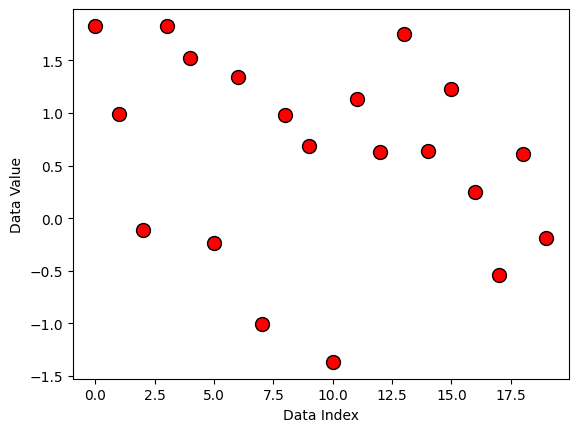

In [4]:
##generate the data

#parameters
N = 20 #sample size
popMu = .5
data = np.random.randn(N) + popMu

#Lets plot the data
plt.plot(data, 'ko', markerfacecolor='r', markersize=10)
plt.xlabel('Data Index')
plt.ylabel('Data Value')
plt.show()


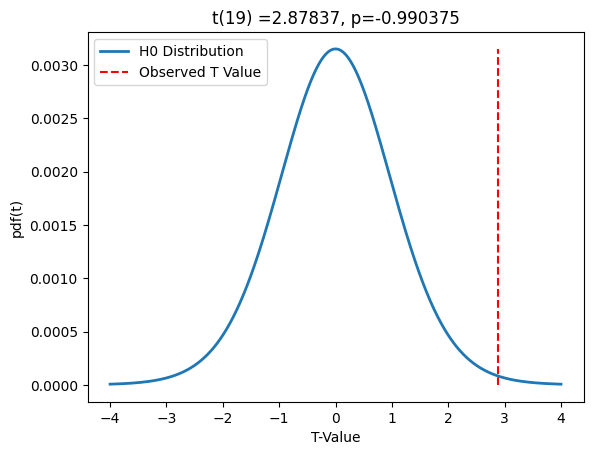

In [5]:
##manual t-test

#Create the null hypothesis
H0val = 0

#compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1)/np.sqrt(N)
t_val = t_num/t_den

#Degrees of Freedom for a one sample t-test
#
df = N-1

#P-Value
pval = 1 - stats.t.cdf(abs(t_val), df) * 2

#Show the H0 paramter distribution and observed t dist goes up, and it plateau
#then we evaluate the t-value on the right against the cdf

x = np.linspace(-4,4, 1001)
#the associated cdf is the sum of the prob dist
tdist = stats.t.pdf(x, df) * np.mean(np.diff(x))
plt.plot(x, tdist, linewidth=2)
plt.plot([t_val, t_val], [0, max(tdist)], 'r--')
plt.xlabel('T-Value')
plt.ylabel('pdf(t)')
plt.legend(('H0 Distribution', 'Observed T Value'))
plt.title('t(%g) =%g, p=%g' %(df,t_val, pval))
plt.show()

In [6]:
#now using the Python function
t,p = stats.ttest_1samp(data, H0val)
print(t,p)

2.8783711944982895 0.009625036018221261


**Two Sample T-Test**
<br>
*Two whether two sets of numbers could have been drawn from the same distribution*
<br>
<br>
*Test whether self reported stress levels changed after 6 weeks*
<br>
**Formal statement: Estimate the probability that self reported stress levels before and after 6 weeks of social distancing were drawn from the same distribution**


**Two Sample T-Test**
<br>

There are several two sample test formulas
<br>

The numerator is always the same
<br>

The denominator depends on whether the groups are paired or unpaired, have equal or unequal variance, amd have matched or different sample sizes

**Explanation of T-Test**
<br>
*Paried or Unparied: Whether the two groups of data are drawn from the same or different individuals*
<br>

*Paired: The same individuals self report their stress levels before vs after social distancing*
<br>
*Unpaired: Change in social distancing related stress in Two Random Countries*

*Equal or Unequal Variance:Whether the two groups have (roughly) equal variance*
<br>
*Equal Variance:* Groups "A" and "B" are caucasian 20-year old students from the same university group
<br>
"A" studies engineering and group "B" studies computer science.
<br>
*Unequal Variance:  Groups "A" is caucasian 20-year old students from the same engineering university. Group B is a random sample of 20 year olds from across the country*

*Equal or Unequal sample sizes: Whether the groups have the same number of values(applies only to unpaired groups)*

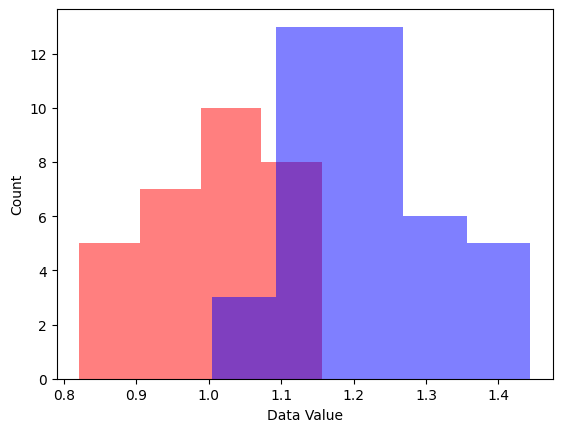

In [7]:
## Generate the data

#parameters
n1 = 30
n2 = 40
mu1 = 1 #population mean in dataset 1
mu2 = 1.2 #population mean in dataset 2

#generate random data and simulate scenarios where there
#is limited sample variability
data1 = mu1 + np.random.randn(n1)/10
data2 = mu2 + np.random.randn(n2)/10

#Plot their histograms
plt.hist(data1, bins='fd', color=[1,0,0,.5], label='Data1')
plt.hist(data2, bins='fd', color=[0,0,1,.5], label='Data2')
plt.xlabel('Data Value')
plt.ylabel('Count')
plt.show()

In [8]:
##now time for the ttest
t_value, p_value = stats.ttest_ind(data1,data2,equal_var=True)
#ttest_ind is for independent samples or unpaired samples t-test
#the formula for the t-test change slightly depending on equal or unequal variance

#Degree of Freedom
df = n1 + n2 - 2

print('t(%g)=%g, p=%g'%(df,t_value,p_value))

t(68)=-9.49135, p=4.41161e-14


*Highly Significant T-Test*

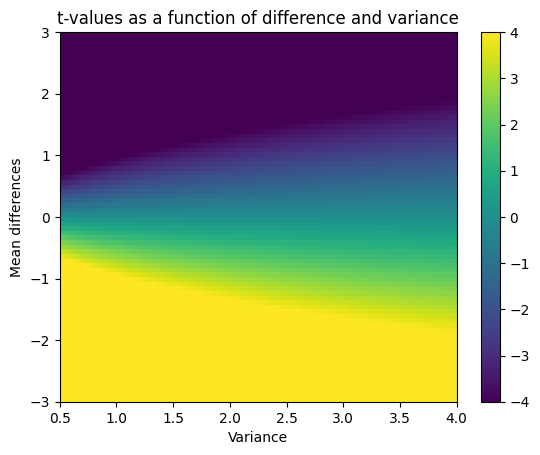

In [3]:
##a 2D space of t-values

#range for t-values parameters
meandiffs = np.linspace(-3,3,80) #numerator
pooledvar = np.linspace(.5,4,100) #denominator

#group sample size
n1 = 40
n2 = 30

#initialize output matrix
allTvals = np.zeros((len(meandiffs), len(pooledvar)))

#loop over the parameters
for meani in range(len(meandiffs)):
  for vari in range(len(pooledvar)):
    #t-value denominator
    df = n1 + n2 -2
    s = np.sqrt(((n1-1)*pooledvar[vari] + (n2-1)*pooledvar[vari])/df)
    t_den = s * np.sqrt(1/n1 + 1/n2)

    #t-values in the matrix
    allTvals[meani, vari] = meandiffs[meani]/ t_den

plt.imshow(allTvals, vmin=-4, vmax=4, extent=[pooledvar[0], pooledvar[-1], meandiffs[0],meandiffs[-1]], aspect='auto')
plt.xlabel('Variance')
plt.ylabel('Mean differences')
plt.colorbar()
plt.title('t-values as a function of difference and variance')
plt.show()

A matrix of t-values that I am visualizing, and each color in the corresponds to t value.
<br>
This y-axis is the mean differences, thats the numerator
<br>
and the x-axis is the pooled standard deviation or the variability
<br>
If we consider the the relationship between the pooled variance and the mean difference of the numerator.
<br>
We notice even when the mean difference is large, if we have variability in the groups
<br>
we are still going to get a small t-statistic

**Wilcoxon Signed Rank(Nonparametric T-Test)**
<br>
If the data violates the assumption of mean and standard deviation are valid descriptors of central tendency
<br>
that they data are approximately normally distributed
<br>
*Wilcoxon Signed Rank* alternative to the one or two sample t-test
<br>
Tests for differences in medians instead of differences in means(medians are insensitive to outliers)

**Different nonparametric median t-test**
<br>
* Wilcoxon signed-rank test- one sample
* Signed-rank test- two dependent(paired)samples
<br>

* Mann-Whitney U test- Two independent samples
* Mann-Whitney-Wilcoxon U test- Two independent samples
* Wilcoxon rank-sum test- Two independent samples


**Algorithm to compute the Wilcoxon Test**
<br>

* Step 1 - Remove equal pairs or data points that equal the H0 value
<br>

 *Equal pairs do not contribute to the test either way*

<br>

* Step 2 - Rank transform differences
<br>

 *r = rank (|x-y|), x-y are the paired differences. For a one sample test y is the H0 value*
<br>

* Step 3 - Sum ranks where x>y
<br>

 *W = sum(rX(x>y))*

<br>

* Step 4 - Convert to Z
<br>

 *Z is normally distributed under H0 and can be converted to a p-value *
<br>

treating z/p value like a normal standard deviation number


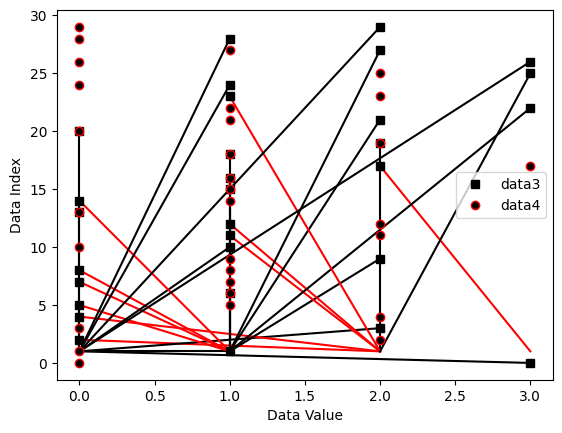

In [6]:
#generate the data
# N = 30

# data3 = np.random.poisson(1.5,N)
# data4 = np.random.poisson(1,N)

# colors = 'kr'
# for i in range(N):
#   plt.plot([data3[i], data4[i]], [i, 1],colors[int(data3[i]<data4[i])])

# plt.plot(data3, np.arange(N), 'ks', markerfacecolor='k', label='data3')
# plt.plot(data4, np.arange(N), 'ro', markerfacecolor='k', label='data4')

# plt.ylabel('Data Index')
# plt.xlabel('Data Value')
# plt.legend()
# plt.show()


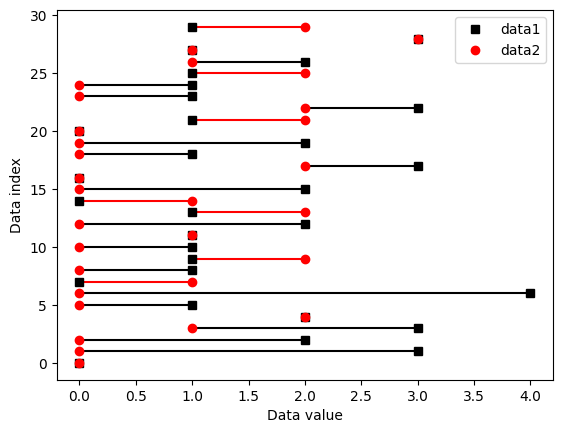

In [7]:
N = 30

data1 = np.random.poisson(1.5,N)
data2 = np.random.poisson(1,N)

colors = 'kr'
for i in range(N):
    plt.plot([data1[i], data2[i]],[i, i],colors[int(data1[i]<data2[i])])

plt.plot(data1,np.arange(N),'ks',markerfacecolor='k',label='data1')
plt.plot(data2,np.arange(N),'ro',markerfacecolor='r',label='data2')

plt.ylabel('Data index')
plt.xlabel('Data value')
plt.legend()

plt.show()

In [8]:
#Signed Rank Test
t,p = stats.wilcoxon(data1, data2)
print('Wilcoxon z=%g, p=%g'%(t,p))

Wilcoxon z=59.5, p=0.0127565


We can reject null hypothesis here, and state that data1 and data2 do not come from the same distribution.
<br>
It was unlikely that we would have gotten the Z Value of this size if these two distributions "samples" were drawn from the same distribution with the same lambda parameter/median

**Mann-Whitney U Test**
<br>
Nonparametric alternative to the independent two sample test
<br>
Test for differences in medians instead of differences in means
<br>
***The two groups do not need to have the same sample size***


**Algorithm to compute the Mann-Whitney U**
<br>
* Step 1: Note the N's
* Step 2: Pool the data and rank
* Step 3: Compute U
* Step 4: Convert to z

In [11]:
#Different sample sizes
N1 = 30
N2 = 40

data1 = np.random.poisson(2,N1)
data2 = np.random.poisson(1,N2)

#U Test
U,p = stats.mannwhitneyu(data1, data2)
print(U,p)

868.5 0.0008628232959949061


**Premutation Testing for t-test**
<br>

With parametric statistics the way to determine statistical significance is by evaluating the position of your observed t value relative to an analytic distribution of t-values that are expected based on the H0 of no effect.
<br>

With premutation testing you do not want to make any assumptions about where the H0 comes from or what it might look like.
<br>

Instead you compute a H0 distribution of our own based on the data that we actually have. You can then observe our own statistic value relative to the empircal distribution.
<br>

We compute the Z Score as our observed value minus the mean *exception value of the emprical H0 distribution* divided by the STD of the H0

<br>

*the oberseved value is not inside the distribution*

<br>
The method is appropriate for approximately Gaussian H0 distribution because we need the mean and the standard deviation to be valid and useful descriptors.
<br>


The second method is to compute the p-value based on counts. Probability based on counts, when you sum up all of the H0 values that are greater than the observed test statistic.
<br>

*how many times did the H0 test produce a t test that was larger than the observed value*
<br>

Pc = sum(H0>obs)/NH0